<div style="text-align: center"><img width=150px src="http://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/200px-R_logo.svg.png"></div>

# <span style="font-size:6vw;font-weight:800;text-shadow:2px 2px 10px #aaa">Two Days Faculty Development Programe</span>

# An introduction to R

R is a highly extensible language and environment for statistical computing and graphics. It's distributed for free under the GNU General Public License, enjoys strong community support, and is known for its ability to produce publication-quality plots including mathematical symbols and formulae. You can learn more about R at [r-project.org](https://www.r-project.org/about.html) and [An Introduction to R](https://cran.r-project.org/doc/manuals/r-release/R-intro.html).

Typically, using R typically means taking the time to set up an R environment. Azure Notebooks removes this detailed process, giving you a pre-configured environment that's ready for your R code.

This notebook demonstrates R within a Jupyter notebook, using material from [Section 2 - Simple manipulations; numbers and vectors](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Simple-manipulations-numbers-and-vectors) and [Appendix A - A Sample Session](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#A-sample-session) from the aforementioned *An Introduction to R* documentation. It also includes content built around the well-known `demo(graphics)` command of R, with comments converted into Markdown cells. 

Note that the R kernel is still in development, so some language features may not be available. To submit issues and requests for features, refer to the [Azure Notebooks GitHub repository](https://github.com/Microsoft/AzureNotebooks/issues).

## Simple manipulations; numbers and vectors

### Vectors and assignment

R operates on named *data structures*. The simplest such structure is the numeric *vector*, which is a single entity consisting of an ordered collection of numbers. To set up a vector named `x`, say, consisting of five numbers, namely 10.4, 5.6, 3.1, 6.4 and 21.7, use the following R command:

In [1]:
x <- c(10.4, 5.6, 3.1, 6.4, 21.7)

In a notebook, the previous cell won't show any output. You can see the contents of `x` by simple running `x` in a code cell:

In [2]:
x

[1] 10.4  5.6  3.1  6.4 21.7

`x <-` is an assignment statement using the *function* `c()`, which in this context can take an arbitrary number of vector arguments and whose value is a vector got by concatenating its arguments end to end.

A number occurring by itself in an expression is taken as a vector of length one.

The assignment operator (`<-`) consists of the two characters, `<` ("less than") and '-' ("minus") occurring strictly side-by-side. The operator points to the object receiving the value of the expression. In most contexts the '=' operator can be used as an alternative.

Assignment can also be made using the `assign()` function (including here also the line `x` to show the value as output). The `<-` operator can be thought of as a shortcut to `assign()`.

In [3]:
assign("x", c(10.4, 5.6, 3.1, 6.4, 21.7))
x

[1] 10.4  5.6  3.1  6.4 21.7

Assignments can also be made from left to right by changing the direction of the assignment operator: 

In [4]:
c(10.4, 5.6, 3.1, 6.4, 21.7) -> x
x

[1] 10.4  5.6  3.1  6.4 21.7

If an expression is used as a complete command, the value is printed and lost. For example, the following statement displays the reciprocals of the values in `x`, but doesn't assign those values to any variable:

In [5]:
1/x

[1] 0.09615385 0.17857143 0.32258065 0.15625000 0.04608295

Finally, the following code creates a vector `y` with 11 entries consisting of two copies of x with a zero in the middle place.

In [6]:
y <- c(x, 0, x)
y

[1] 10.4  5.6  3.1  6.4 21.7  0.0 10.4  5.6  3.1  6.4 21.7

### Vector arithmetic

Vectors can be used in arithmetic expressions, in which case the operations are performed element by element. Vectors occurring in the same expression need not all be of the same length. If they are not, the value of the expression is a vector with the same length as the longest vector which occurs in the expression. Shorter vectors in the expression are *recycled* as often as need be (perhaps fractionally) until they match the length of the longest vector. In particular, a constant is simply repeated.

The following expression, using the `x` and `y` values from the previous section (which, if you ran those code cells, are in the notebook session), generates a new vector v of length 11 constructed by adding together, element by element, 2\*x repeated 2.2 times, y repeated just once, and 1 repeated 11 times. Note that the code issues a warning because the length of y is not an integral multiple of 2\*x.

In [7]:
v <- 2*x + y + 1
v

Warning message in 2 * x + y:
“longer object length is not a multiple of shorter object length”

[1] 32.2 17.8 10.3 20.2 66.1 21.8 22.6 12.8 16.9 50.8 43.5

The elementary arithmetic operators are the usual `+`, `-`, `*`, `/`, and `^` (raise to a power), along with all the common arithmetic functions: `log`, `exp`, `sin`, `cos`, `tan`, `sqrt`, and so on. `max` and `min` select the largest and smallest elements of a vector, respectively. `range(v)` returns a vector of length two, namely `c(min(x), max(x))`. `length(x)` is the number of elements in `x`, `sum(x)` gives the total of the elements in `x`, and `prod(x)` their product.

In [8]:
log(v)
sin(v)
sqrt(v)
min(v)
max(v)
range(v)
length(v)
sum(v)
prod(v)

[1] 3.471966 2.879198 2.332144 3.005683 4.191169 3.081910 3.117950 2.549445
 [9] 2.827314 3.927896 3.772761

[1]  0.7061695 -0.8672022 -0.7676858  0.9758205 -0.1262167  0.1899867
 [7] -0.5719257  0.2315098 -0.9291240  0.5094259 -0.4638155

[1] 5.674504 4.219005 3.209361 4.494441 8.130191 4.669047 4.753946 3.577709
 [9] 4.110961 7.127412 6.595453

[1] 10.3

[1] 66.1

[1] 10.3 66.1

[1] 11

[1] 315

[1] 1.856438e+15

Two statistical functions are `mean(x)`, which calculates the sample mean and is the same as `sum(x)/length(x)`, and `var(x)` which gives the sample variance:

In [9]:
sum((x-mean(x))^2)/(length(x)-1)
var(x)

[1] 53.853

[1] 53.853

If the argument to `var()` is an n-by-p matrix the value is a *p*-by-*p* sample covariance matrix got by regarding the rows as independent *p*-variate sample vectors. 

`sort(x)` returns a vector of the same size as `x` with the elements arranged in increasing order; however there are other more flexible sorting facilities available (see `order()` or `sort.list()` which produce a permutation to do the sorting). 

Note that `max` and `min` select the largest and smallest values in their arguments, even if they are given several vectors. The *parallel* max/min functions `pmax` and `pmin` return a vector (of length equal to their longest argument) that contains in each element the largest (smallest) element in that position in any of the input vectors. 

For most purposes, you're not concerned if the "numbers" in a numeric vector are integers, reals or even complex. Internally calculations are done as double precision real numbers, or double precision complex numbers if the input data are complex. 

To work with complex numbers, supply an explicit complex part, otherwise, as the code below demonstrates, you'll see a Nan (not-a-number) warning:

In [10]:
sqrt(-17)

Warning message in sqrt(-17):
“NaNs produced”

[1] NaN

But the following expression performs the computation as complex numbers:

In [11]:
sqrt(-17+0i)

[1] 0+4.123106i

### Generating regular sequences

R has a number of facilities for generating commonly used sequences of numbers. For example, the colon is a shorthand for creating a vector of sequential numbers in ascending or descending order:

In [12]:
1:30
30:1

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

[1] 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6
[26]  5  4  3  2  1

`1:30` is equivalent to writing `c(1, 2, 3, ..., 30)`, and a lot less tedious!

Within expressions, the colon has a higher precedence than other operators except parenthases:

In [13]:
2*1:15

n <- 10
1:n-1
1:(n-1)

[1]  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30

[1] 0 1 2 3 4 5 6 7 8 9

[1] 1 2 3 4 5 6 7 8 9

The `seq()` function is a more general means for generating sequences. It has five arguments, only some of which may be specified in any one call. The first two arguments, if given, specify the beginning and end of the sequence, and if these are the only two arguments given the result is the same as the colon operator. For example, `seq(2,10)` is the same vector as `2:10`. 

In [14]:
seq(2,10)
2:10

[1]  2  3  4  5  6  7  8  9 10

[1]  2  3  4  5  6  7  8  9 10

Arguments to `seq()`, and to many other R functions, can also be given in named form, in which case the order in which they appear is irrelevant. With `seq()`, the first two arguments may be named `from=value` and `to=value`; thus the following expressions are all identical:

In [15]:
seq(1,30)
seq(from=1, to=30)
seq(to=30, from=1)
1:30

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30

The next two arguments to `seq()` may be named `by=value` and `length=value`, which specify a step size and a length for the sequence respectively. If neither of these is given, the default `by=1` is assumed. For example:

In [16]:
seq(-5, 5, by=.2) -> s3               # Assigns the vector c(-5.0, -4.8, -4.6, …, 4.6, 4.8, 5.0) to s3
s3

s4 <- seq(length=51, from=-5, by=.2)  # Assigns the same vector to s4
s4

[1] -5.0 -4.8 -4.6 -4.4 -4.2 -4.0 -3.8 -3.6 -3.4 -3.2 -3.0 -2.8 -2.6 -2.4 -2.2
[16] -2.0 -1.8 -1.6 -1.4 -1.2 -1.0 -0.8 -0.6 -0.4 -0.2  0.0  0.2  0.4  0.6  0.8
[31]  1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  3.8
[46]  4.0  4.2  4.4  4.6  4.8  5.0

[1] -5.0 -4.8 -4.6 -4.4 -4.2 -4.0 -3.8 -3.6 -3.4 -3.2 -3.0 -2.8 -2.6 -2.4 -2.2
[16] -2.0 -1.8 -1.6 -1.4 -1.2 -1.0 -0.8 -0.6 -0.4 -0.2  0.0  0.2  0.4  0.6  0.8
[31]  1.0  1.2  1.4  1.6  1.8  2.0  2.2  2.4  2.6  2.8  3.0  3.2  3.4  3.6  3.8
[46]  4.0  4.2  4.4  4.6  4.8  5.0

The fifth argument may be named `along=vector`, which is normally used as the only argument to create the sequence 1, 2, ..., `length(vector)`, or the empty sequence if the vector is empty (as it can be).

A related function is `rep()` which can be used for replicating an object in various complicated ways. The simplest form is the following, which puts five copies of `x` end-to-end in `s5`.

In [17]:
s5 <- rep(x, times=5)
s5

[1] 10.4  5.6  3.1  6.4 21.7 10.4  5.6  3.1  6.4 21.7 10.4  5.6  3.1  6.4 21.7
[16] 10.4  5.6  3.1  6.4 21.7 10.4  5.6  3.1  6.4 21.7

Another useful version is the following expression, which repeats each element of `x` five times before moving on to the next.

In [18]:
s6 <- rep(x, each=5)
s6

[1] 10.4 10.4 10.4 10.4 10.4  5.6  5.6  5.6  5.6  5.6  3.1  3.1  3.1  3.1  3.1
[16]  6.4  6.4  6.4  6.4  6.4 21.7 21.7 21.7 21.7 21.7

### Logical vectors

Along with numerical vectors, R allows manipulation of logical quantities. The elements of a logical vector can have the values `TRUE`, `FALSE`, and `NA` (for "not available"). The first two are often abbreviated as `T` and `F`, respectively. However, `T` and `F` are just variables that are set to `TRUE` and `FALSE` by default; they aren't reserved words and thus can be overwritten by your own code if you use the same names (and the same case; variables in R are case-sensitive). Consequently, always use `TRUE` and `FALSE` for clarity:


In [19]:
T
F

t <- 5
t
T

T <- 10
T
TRUE

[1] TRUE

[1] FALSE

[1] 5

[1] TRUE

[1] 10

[1] TRUE

Logical vectors are generated by *conditions*. The following expression, for example, sets `temp` as a vector of the same length as `x` with values `FALSE` corresponding to elements of `x` where the condition is not met and `TRUE` where it is:

In [20]:
temp <- x > 13
temp

[1] FALSE FALSE FALSE FALSE  TRUE

The logical operators are `<`, `<=`, `>`, `>=`, `==` for exact equality, and `!=` for inequality. In addition if `c1` and `c2` are logical expressions, then `c1 & c2` is their intersection ("and"), `c1 | c2` is their union ("or"), and `!c1` is the inverse of `c1`. 

Logical vectors may be used in ordinary arithmetic, in which case they are coerced into numeric vectors, `FALSE` becoming 0 and `TRUE` becoming 1. However there are situations where logical vectors and their coerced numeric counterparts are not equivalent, as explained in the next section.

### Missing values

In some cases, the components of a vector may not be completely known. When an element or value is "not available" or a "missing value" in the statistical sense, you can reserve a place for it within a vector by assigning it the special value `NA`. In general, any operation on an `NA` becomes an `NA`. The motivation for this rule is simply that if the specification of an operation is incomplete, the result cannot be known and hence is not available. 

The function `is.na(x)` gives a logical vector of the same size as `x` with value `TRUE` if and only if the corresponding element in `x` is `NA`:


In [21]:
z <- c(1:3,NA);  ind <- is.na(z)
z; ind

[1]  1  2  3 NA

[1] FALSE FALSE FALSE  TRUE

Notice that the logical expression `x == NA` is quite different from `is.na(x)` because `NA` is not really a value but a marker for a quantity that is not available. Thus `x == NA` is a vector of the same length as `x`, *all* of whose values are `NA` as the logical expression itself is incomplete and hence undecidable. 

There is also is a second kind of "missing" value, the NaN or not-a-number, which is produced by numerical computation that cannot be sensibly performed:

In [22]:
0/0
Inf - Inf

[1] NaN

[1] NaN

In summary, `is.na(x)` is `TRUE` for *both* `NA` and `NaN` values. To differentiate these, `is.nan(x)` is only `TRUE` for NaNs. 
Missing values are sometimes printed as `<NA>` when character vectors are printed without quotes. 

### Character vectors

Character quantities and character vectors are used frequently in R, for example as plot labels. They're defined by a sequence of characters inside double quotes, for example:

In [23]:
"x-values"
"New iteration results"

[1] "x-values"

[1] "New iteration results"

Character strings are entered using either matching double (") or single (') quotes, but are printed using double quotes (or sometimes without quotes). They use C-style escape sequences, using `\` as the escape character, so `\\` is entered and printed as \\, and inside double quotes. `"` is entered as `\"`. Other useful escape sequences are `\n` (newline), `\t` (tab), and `\b` (backspace). —see ?Quotes for a full list. 

Character vectors may be concatenated into a vector using the `c()` function. 

The `paste()` function takes an arbitrary number of arguments and concatenates them one by one into character strings. Any numbers given among the arguments are coerced into character strings in the evident way, that is, in the same way they would be if they were printed. The arguments are by default separated in the result by a single blank character, but this can be changed by the named argument, sep=string, which changes it to string, possibly empty.

For example, the following expression makes `labs` into the same character vector as the second expression:

In [24]:
labs <- paste(c("X","Y"), 1:10, sep="")
labs

c("X1", "Y2", "X3", "Y4", "X5", "Y6", "X7", "Y8", "X9", "Y10")

[1] "X1"  "Y2"  "X3"  "Y4"  "X5"  "Y6"  "X7"  "Y8"  "X9"  "Y10"

[1] "X1"  "Y2"  "X3"  "Y4"  "X5"  "Y6"  "X7"  "Y8"  "X9"  "Y10"

Note particularly that recycling of short lists takes place here; thus `c("X", "Y")` is repeated five times to match the sequence `1:10`.

### Index vectors; selecting and modifying subsets of a data set

Subsets of the elements of a vector may be selected by appending to the name of the vector an *index vector* in square brackets. More generally any expression that evaluates to a vector may have subsets of its elements similarly selected by appending an index vector in square brackets immediately after the expression. 

Such index vectors can be any of four distinct types.

#### (1) A logical vector

In this case the index vector is recycled to the same length as the vector from which elements are to be selected. Values corresponding to `TRUE` in the index vector are selected and those corresponding to `FALSE` are omitted. For example, the following expression creates (or re-creates) an object `y` which contains the non-missing values of `x`, in the same order. Note that if `x` has missing values, `y` is be shorter than `x`.

In [25]:
y <- x[!is.na(x)]
y

[1] 10.4  5.6  3.1  6.4 21.7

The following expression creates an object `z` and places in it the values of the vector `x+1` for which the corresponding value in `x` was both non-missing and positive:

In [26]:
(x+1)[(!is.na(x)) & x>0] -> z
z

[1] 11.4  6.6  4.1  7.4 22.7

#### (2) A vector of positive integral quantities

In this case the values in the index vector must lie in the set {1, 2, ..., length(x)}. The corresponding elements of the vector are selected and concatenated, *in that order*, in the result. The index vector can be of any length and the result is of the same length as the index vector. For example:

In [27]:
x[6]    # The sixth component of x
x[1:10] # Selects the first 10 elements of x (assuming length(x) is not less than 10)

[1] NA

[1] 10.4  5.6  3.1  6.4 21.7   NA   NA   NA   NA   NA

The following expression, though an admittedly unlikely thing to use, produces a character vector of length 16 consisting of "x", "y", "y", "x" repeated four times:

In [28]:
c("x","y")[rep(c(1,2,2,1), times=4)]

[1] "x" "y" "y" "x" "x" "y" "y" "x" "x" "y" "y" "x" "x" "y" "y" "x"

#### A vector of negative integral quantities

Such an index vector specifies the values to be excluded rather than included. Thus the following expression gives y all but the first five elements of x.

In [29]:
y <- x[-(1:5)]
y

numeric(0)

#### A vector of character strings

This possibility applies only where an object has a names attribute to identify its components. In this case a sub-vector of the names vector may be used in the same way as the positive integral labels in item 2 further above. 

In [30]:
fruit <- c(5, 10, 1, 20)
fruit

names(fruit) <- c("orange", "banana", "apple", "peach")
fruit

lunch <- fruit[c("apple","orange")]
lunch

[1]  5 10  1 20

orange banana  apple  peach 
     5     10      1     20

apple orange 
     1      5

The advantage of such vectors is that alphanumeric *names* are often easier to remember than *numeric indices*. This option is particularly useful in connection with data frames.

Besides the four types above, an indexed expression can also appear on the receiving end of an assignment, in which case the assignment operation is performed *only on those elements of the vector*. The expression must be of the form `vector[index_vector]` as having an arbitrary expression in place of the vector name does not make much sense here. For example, the first expression below replaces any missing values in x by zeros and the second has the same effect as `y <- abs(y)`:

In [31]:
x[is.na(x)] <- 0
x

y[y < 0] <- -y[y < 0]
y

[1] 10.4  5.6  3.1  6.4 21.7

numeric(0)

### Other types of objects

Vectors are the most important type of object in R, but there are several others which we will meet more formally in later sections. 

*Matrices*, or more generally *arrays*, are multi-dimensional generalizations of vectors. In fact, they are vectors that can be indexed by two or more indices and will be printed in special ways. See [Arrays and matrices](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Arrays-and-matrices). 

*Factors* provide compact ways to handle categorical data. See [Factors](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Factors). 

*Lists* are a general form of vector in which the various elements need not be of the same type, and are often themselves vectors or lists. Lists provide a convenient way to return the results of a statistical computation. See [Lists](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Lists).

*Data frames* are matrix-like structures in which the columns can be of different types. Think of data frames as 'data matrices' with one row per observational unit but with (possibly) both numerical and categorical variables. Many experiments are best described by data frames: the treatments are categorical but the response is numeric. See [Data frames](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Data-frames).

*Functions* are themselves objects in R which can be stored in the project's workspace. This provides a simple and convenient way to extend R. See [Writing your own functions](https://cran.r-project.org/doc/manuals/r-release/R-intro.html#Writing-your-own-functions). 

## A sample R session

The code in this walkthrough introduces you to various features of the R environment, such as plotting and management of objects.

To begin with, generate two psuedo-random normal vectors of x- and y-coordinates:

In [32]:
x <- rnorm(50)
y <- rnorm(x)


Plot the points in a plane, generating an inline graphic. Note the use of `option` to set the graph size larger than the default, which is 4x3:

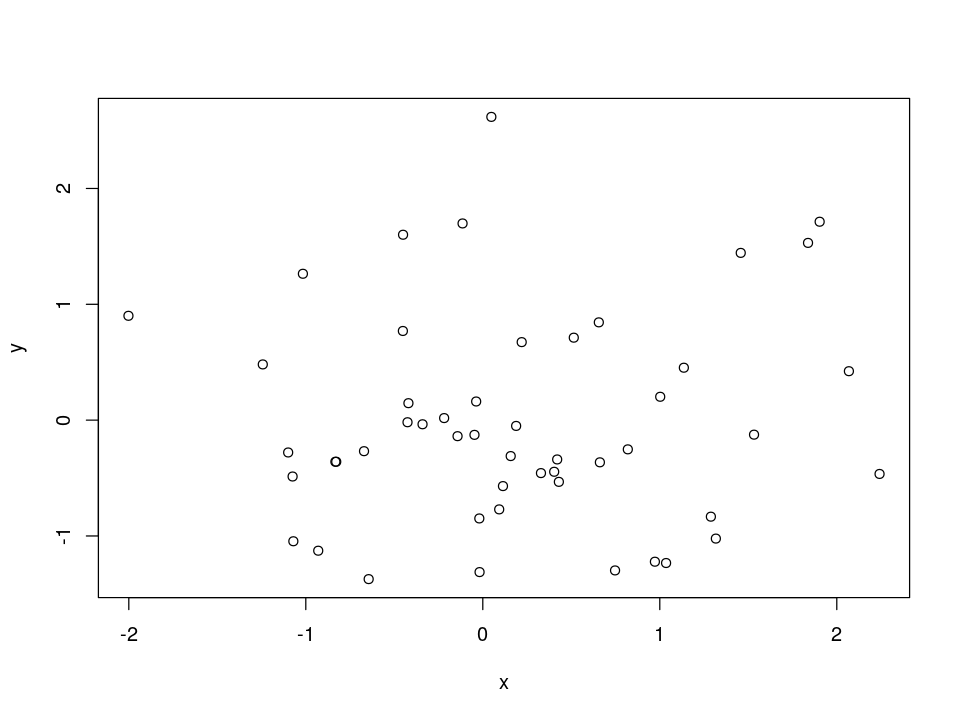

In [33]:
# Set plot size for this section
options(repr.plot.width=8, repr.plot.height=6)

plot(x, y)

See which R objects are now in the R workspace. 

In [34]:
ls()

[1] "fruit" "ind"   "labs"  "lunch" "n"     "s3"    "s4"    "s5"    "s6"   
[10] "t"     "T"     "temp"  "v"     "x"     "y"     "z"

Clean up objects that aren't needed:

In [35]:
rm(x, y)
ls()

[1] "fruit" "ind"   "labs"  "lunch" "n"     "s3"    "s4"    "s5"    "s6"   
[10] "t"     "T"     "temp"  "v"     "z"

Create a 'weight'’ vector of standard deviations:

In [36]:
x <- 1:20            # Create a vector of 1, 2, 3, ... 20
w <- 1 + sqrt(x)/2
w

[1] 1.500000 1.707107 1.866025 2.000000 2.118034 2.224745 2.322876 2.414214
 [9] 2.500000 2.581139 2.658312 2.732051 2.802776 2.870829 2.936492 3.000000
[17] 3.061553 3.121320 3.179449 3.236068

Make a data frame of two columns, x and y, and look at it:

In [37]:
dummy <- data.frame(x=x, y= x + rnorm(x)*w)
dummy

x,y
<int>,<dbl>
1,2.040456
2,3.290883
3,3.348982
4,2.249894
5,5.472972
6,8.449007
7,10.598974
8,7.634384
9,10.989613


Fit a simple linear regression and look at the analysis. With y to the left of the tilde, we are modelling y dependent on x. 

In [38]:
fm <- lm(y ~ x, data=dummy)
summary(fm)


Call:
lm(formula = y ~ x, data = dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3260 -1.5393 -0.0564  0.9978  4.6402 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.65644    0.98223   0.668    0.512    
x            1.05223    0.08199  12.833  1.7e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.114 on 18 degrees of freedom
Multiple R-squared:  0.9015,	Adjusted R-squared:  0.896 
F-statistic: 164.7 on 1 and 18 DF,  p-value: 1.701e-10


Because we know the standard deviations, we can do a weighted regression. 

In [39]:
fm1 <- lm(y ~ x, data=dummy, weight=1/w^2)
summary(fm1)


Call:
lm(formula = y ~ x, data = dummy, weights = 1/w^2)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-1.30683 -0.59795  0.03548  0.37119  1.61498 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.6524     0.7228   0.903    0.379    
x             1.0528     0.0737  14.284 2.91e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7988 on 18 degrees of freedom
Multiple R-squared:  0.9189,	Adjusted R-squared:  0.9144 
F-statistic:   204 on 1 and 18 DF,  p-value: 2.912e-11


Make the columns in the data frame visible as variables (this code produces a warning about objects of the same name being masked in other environments, which can be safely ignored in this demonstration). 

In [40]:
attach(dummy)

The following object is masked _by_ .GlobalEnv:

    x



Make a nonparametric local regression function.

In [41]:
lrf <- lowess(x, y)

The next lines created (a) A standard point plot, (b) a line for the local regressions, (c) the true regression line, (d) unweighted regression line, and (e) weighted regression line.

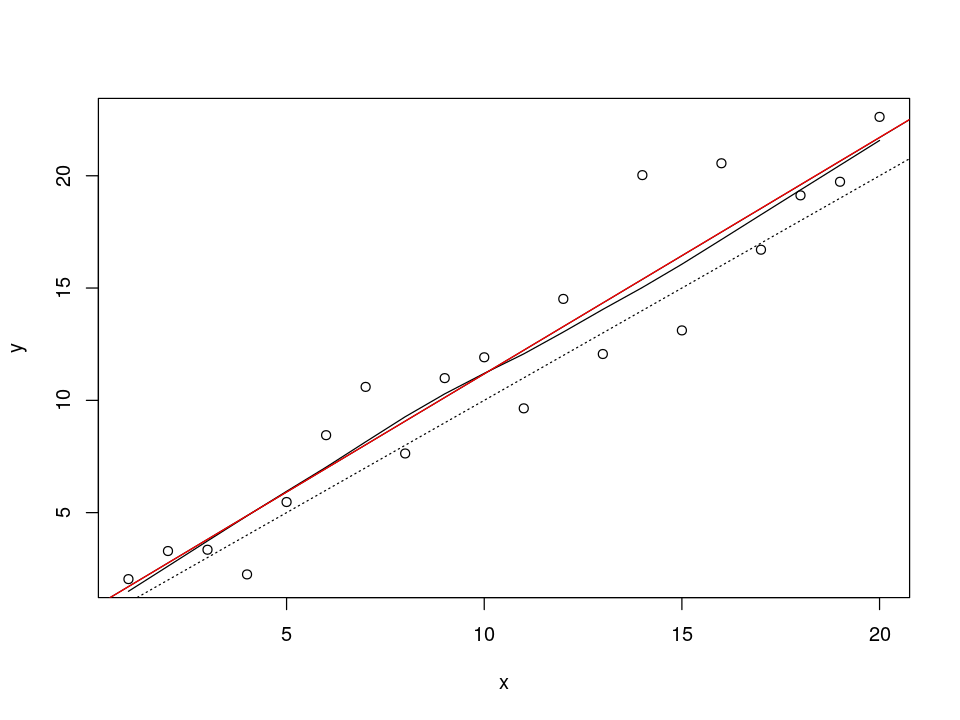

In [42]:
plot(x, y)                     # Standard plot point
lines(x, lrf$y)                # Local regression
abline(0, 1, lty=3)            # True regression line (intercept = 0, slope = 1)
abline(coef(fm))               # Unweighted regression line
abline(coef(fm1), col = "red") # Weighted regression line

Remove data frame from the search path.

In [43]:
detach()

A standard regression diagnostic plot to check for heteroscedasticity. Can you see it? 

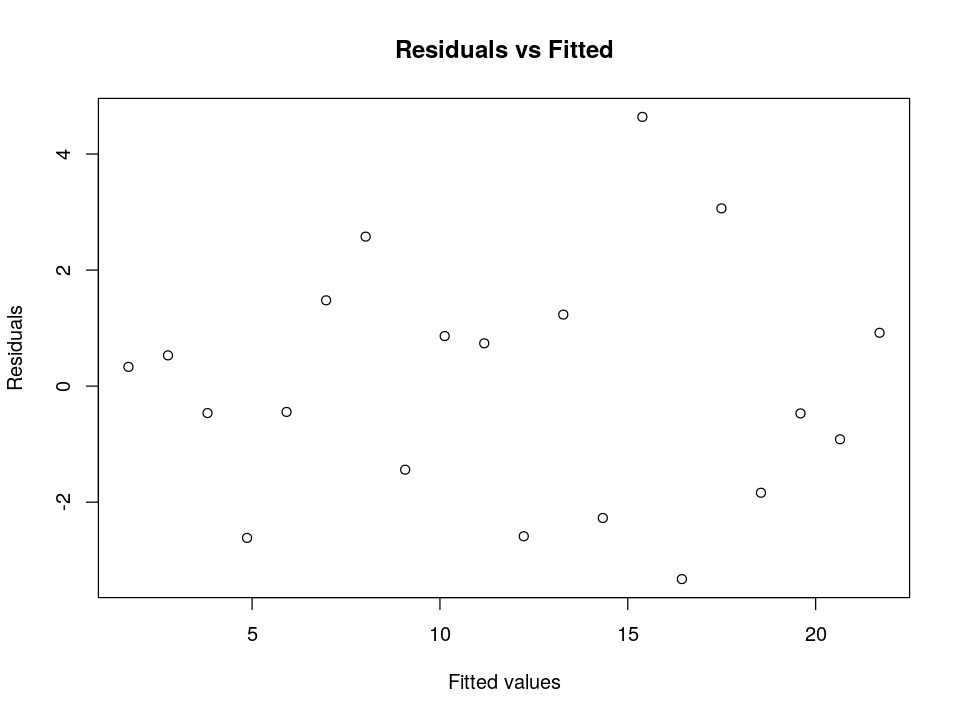

In [44]:
plot(fitted(fm), resid(fm),
     xlab="Fitted values",
     ylab="Residuals",
     main="Residuals vs Fitted")

A normal scores plot to check for skewness, kurtosis and outliers. (Not very useful here.) 

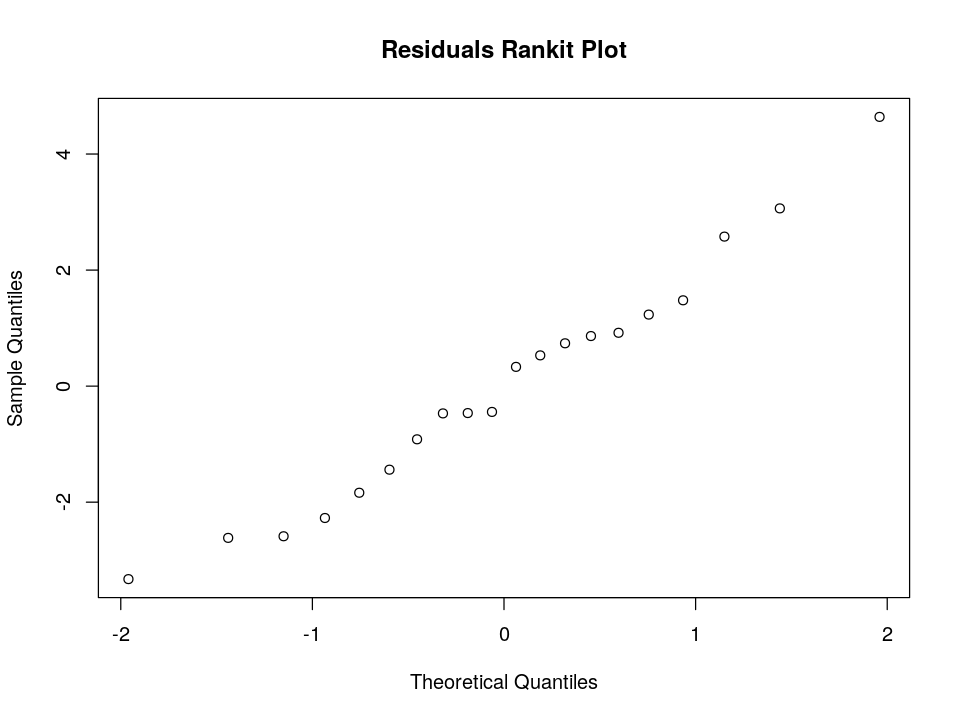

In [45]:
qqnorm(resid(fm), main="Residuals Rankit Plot")

Clean up again.

In [46]:
rm(fm, fm1, lrf, x, dummy)

### Work with the Michelson-Morley experiment

The next section looks at data from the classical experiment of Michelson to measure the speed of light. This dataset is available in the morley object, but we will read it to illustrate the `read.table` function.

Get the path to the data file.

In [47]:
filepath <- system.file("data", "morley.tab" , package="datasets")
filepath

[1] "/usr/lib/R/library/datasets/data/morley.tab"

(Optional) Look at the file, which opens another pane containing the file contents. Use the **x** in the upper right of that pane to close the file view.

In [48]:
file.show(filepath)

Read in the Michelson data as a data frame, and look at it. There are five experiments (column Expt) and each has 20 runs (column Run) and sl is the recorded speed of light, suitably coded. 

In [49]:
mm <- read.table(filepath)
mm

,Expt,Run,Speed
,<int>,<int>,<int>
001,1,1,850
002,1,2,740
003,1,3,900
004,1,4,1070
005,1,5,930
006,1,6,850
007,1,7,950
008,1,8,980
009,1,9,980


Change Expt and Run into factors. 

In [50]:
mm$Expt <- factor(mm$Expt)
mm$Run <- factor(mm$Run)

Make the data frame visible at position 3 (the default). 

In [51]:
attach(mm)

Compare the five experiments with simple boxplots. 

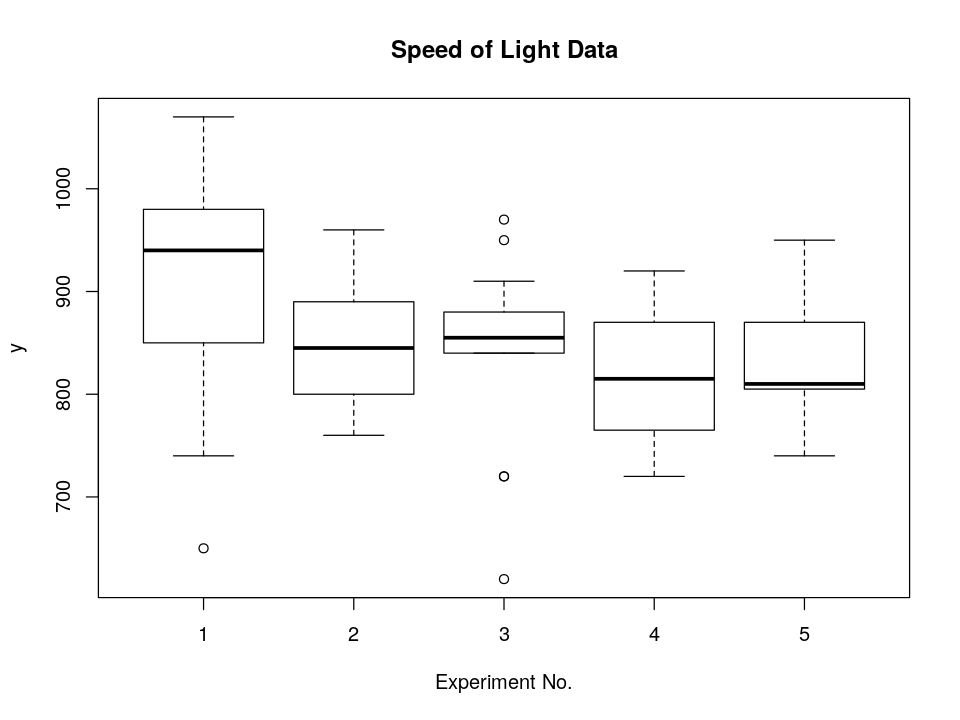

In [52]:
# Set plot size for this section
options(repr.plot.width=8, repr.plot.height=6)

plot(Expt, Speed, main="Speed of Light Data", xlab="Experiment No.")

Analyze as a randomized block, with ‘runs’ and ‘experiments’ as factors. 

In [53]:
fm <- aov(Speed ~ Run + Expt, data=mm)
summary(fm)

            Df Sum Sq Mean Sq F value  Pr(>F)   
Run         19 113344    5965   1.105 0.36321   
Expt         4  94514   23629   4.378 0.00307 **
Residuals   76 410166    5397                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Fit the sub-model omitting ‘runs’, and compare using a formal analysis of variance. 

In [54]:
fm0 <- update(fm, . ~ . - Run)
anova(fm0, fm)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
95,523510,NA,NA,NA,NA
76,410166,19,113344,1.105348,0.3632093


Clean up before moving on. 

In [55]:
detach()
rm(fm, fm0)

### Graphical features: contour and image plots

x is a vector of 50 equally spaced values in the interval [-pi\, pi]. y is the same. 

In [56]:
x <- seq(-pi, pi, len=50)
y <- x

f is a square matrix, with rows and columns indexed by x and y respectively, of values of the function cos(y)/(1 + x^2). 

In [57]:
f <- outer(x, y, function(x, y) cos(y)/(1 + x^2))

Save the plotting parameters and set the plotting region to “square”.

In [58]:
oldpar <- par(no.readonly = TRUE)
par(pty="s")

Make a contour map of f; add in more lines for more detail. 

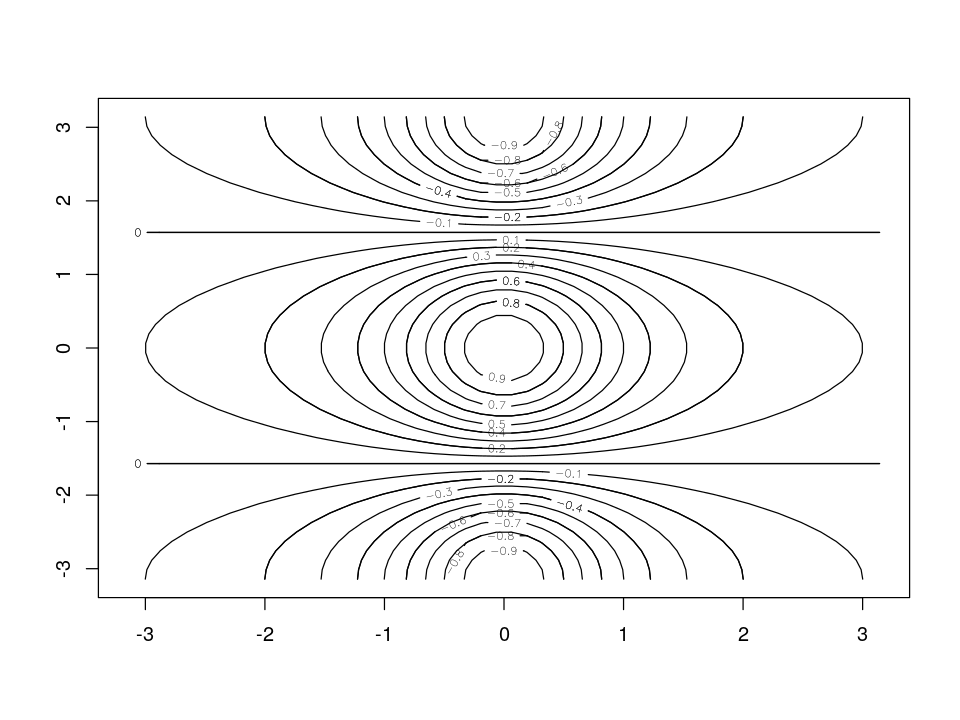

In [59]:
contour(x, y, f)
contour(x, y, f, nlevels=15, add=TRUE)

Make a contour plot. fa is the “asymmetric part” of f. (t() is transpose). 

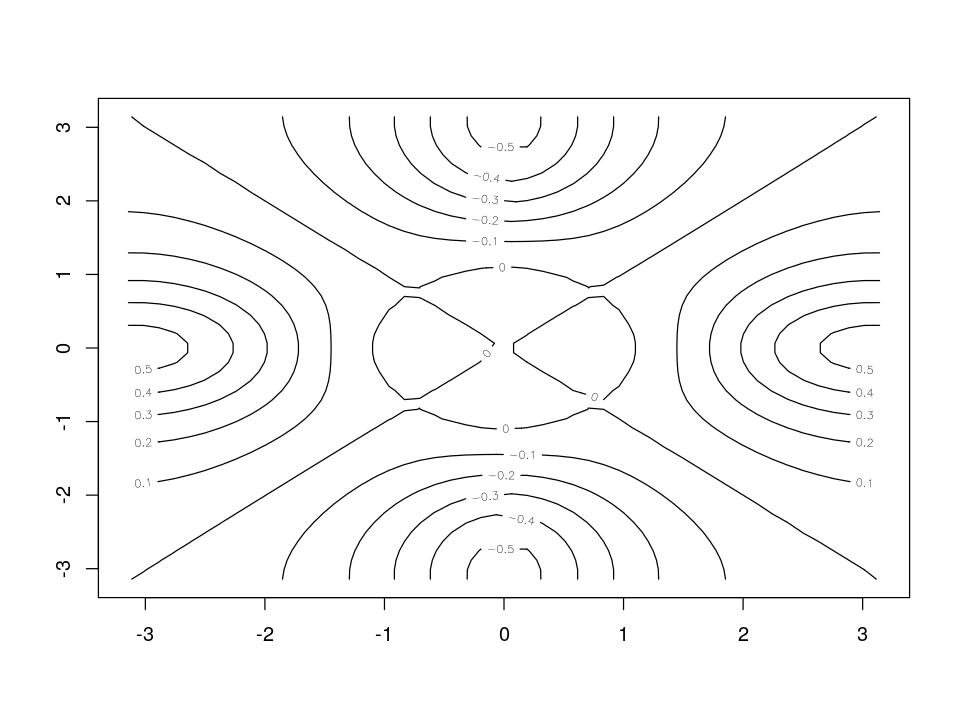

In [60]:
fa <- (f-t(f))/2
contour(x, y, fa, nlevels=15)

Then restore the old graphics parameters. 

In [61]:
par(oldpar)

Make some high density image plots:

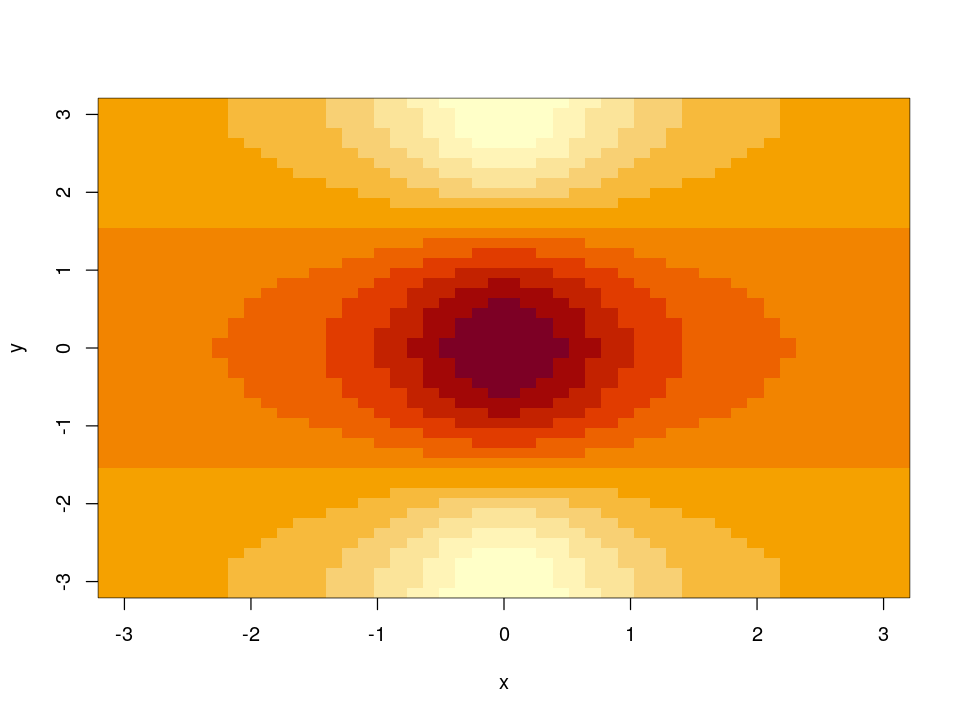

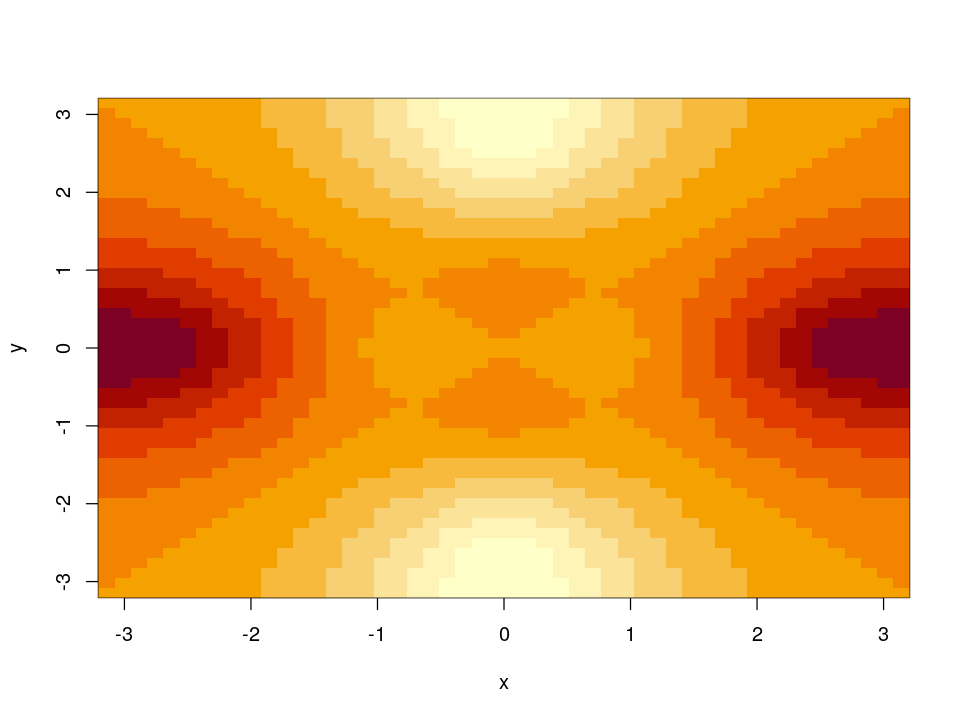

In [62]:
image(x, y, f)
image(x, y, fa)

Clean up before moving on.

In [63]:
objects(); rm(x, y, f, fa)

[1] "f"        "fa"       "filepath" "fruit"    "ind"      "labs"    
 [7] "lunch"    "mm"       "n"        "oldpar"   "s3"       "s4"      
[13] "s5"       "s6"       "t"        "T"        "temp"     "v"       
[19] "w"        "x"        "y"        "z"

### Complex arithmetic in R

1i is used for the complex number i.

In [64]:
th <- seq(-pi, pi, len=100)
z <- exp(1i*th)

Plotting complex arguments means plot imaginary versus real parts. This should be a circle. 

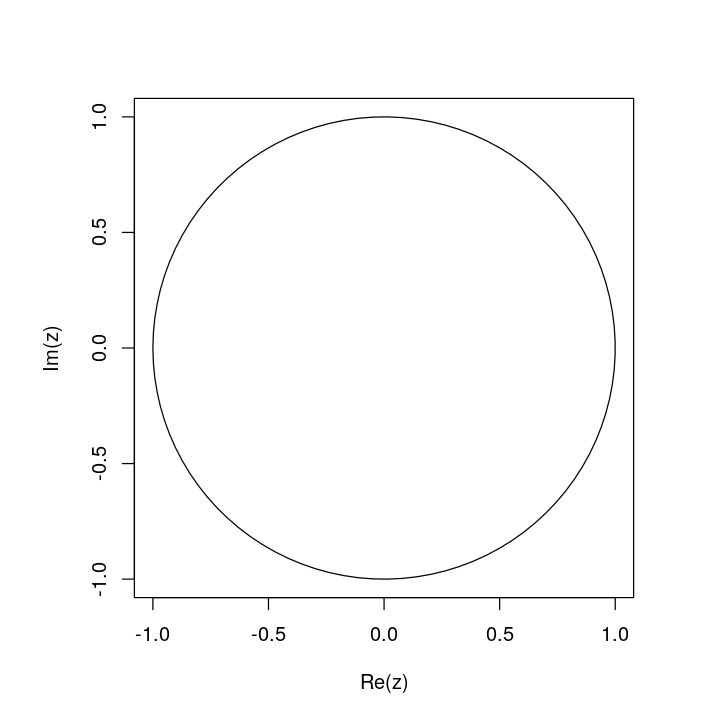

In [65]:
# Set plot size for this section
options(repr.plot.width=6, repr.plot.height=6)

par(pty="s")
plot(z, type="l")

Suppose we want to sample points within the unit circle. One method would be to take complex numbers with standard normal real and imaginary parts:

In [66]:
w <- rnorm(100) + rnorm(100)*1i

And to map any outside the circle onto their reciprocal. 

In [67]:
w <- ifelse(Mod(w) > 1, 1/w, w)

All points are inside the unit circle, but the distribution is not uniform. 

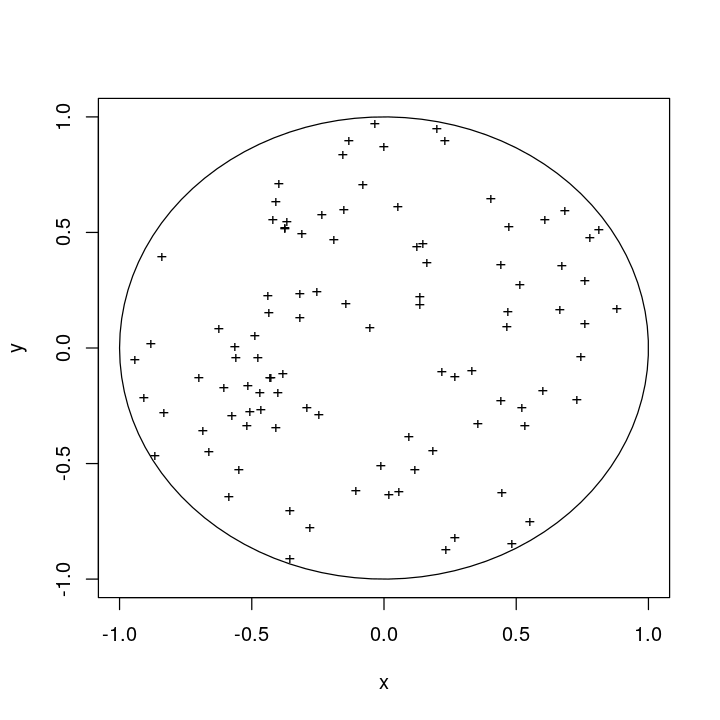

In [68]:
plot(w, xlim=c(-1,1), ylim=c(-1,1), pch="+",xlab="x", ylab="y")
lines(z)

The second method uses the uniform distribution. The points should now look more evenly spaced over the disc. 

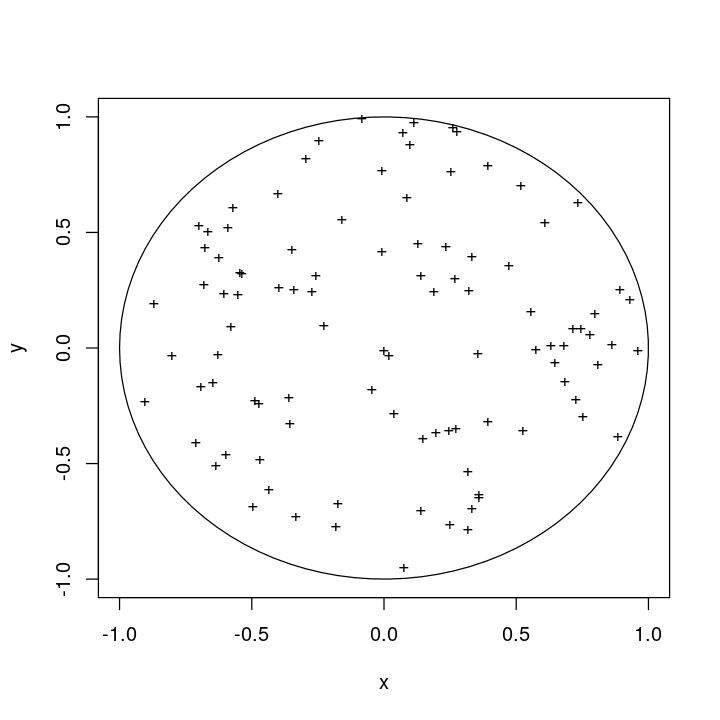

In [69]:
w <- sqrt(runif(100))*exp(2*pi*runif(100)*1i)
plot(w, xlim=c(-1,1), ylim=c(-1,1), pch="+", xlab="x", ylab="y")
lines(z)

Clean up again. 

In [70]:
rm(th, w, z)

 # Comparison of R and S graphics capabilities

The following code cells illustrate some of the differences between R and S graphics capabilities. Colors are generally specified by a character string name (taken from the X11 rgb.txt file) and that line textures are given similarly. The parameter "bg" sets the background parameter for the plot and there is also an "fg" parameter which sets the foreground color.

In [71]:
require(datasets)

require(grDevices); require(graphics)

integer(0)

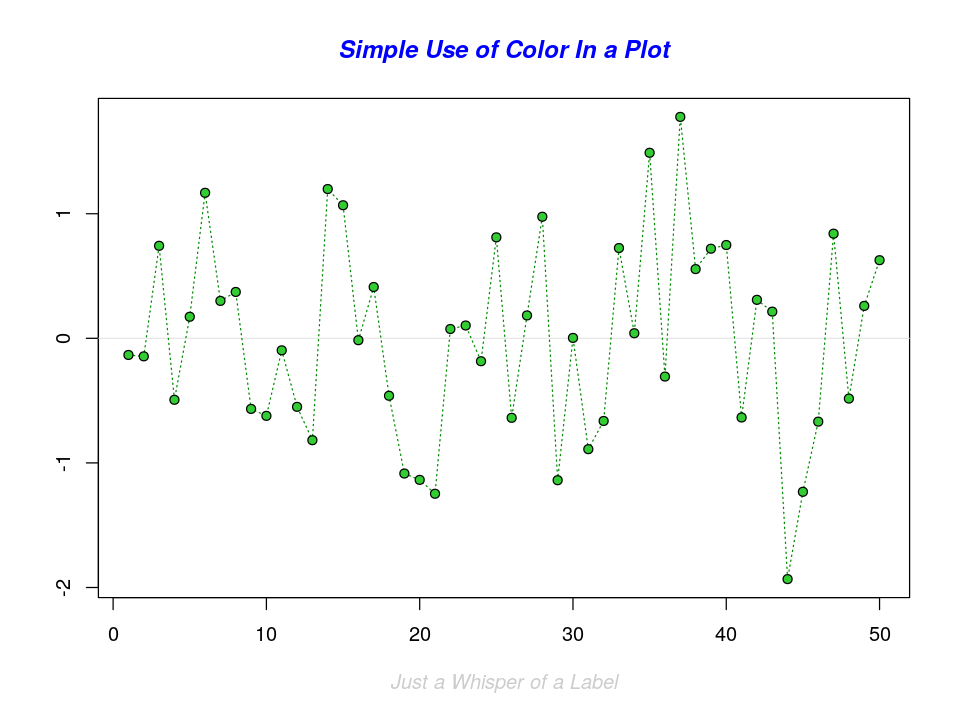

In [72]:
# Set plot size for this section
options(repr.plot.width=8, repr.plot.height=6)

x <- stats::rnorm(50)
opar <- par(bg = "white")
plot(x, ann = FALSE, type = "n") +
abline(h = 0, col = gray(.90)) +
lines(x, col = "green4", lty = "dotted") +
points(x, bg = "limegreen", pch = 21) +
title(main = "Simple Use of Color In a Plot",
       xlab = "Just a Whisper of a Label",
       col.main = "blue", col.lab = gray(.8),
       cex.main = 1.2, cex.lab = 1.0, font.main = 4, font.lab = 3)

## A little color wheel.

This code plots equally spaced hues in a pie chart. On low-quality monitors you may find that numerically equispaced are not visually equispaced and may cluster at the RGB primaries. On high-quality monitor, the color wheel should appear quite accurate.

integer(0)

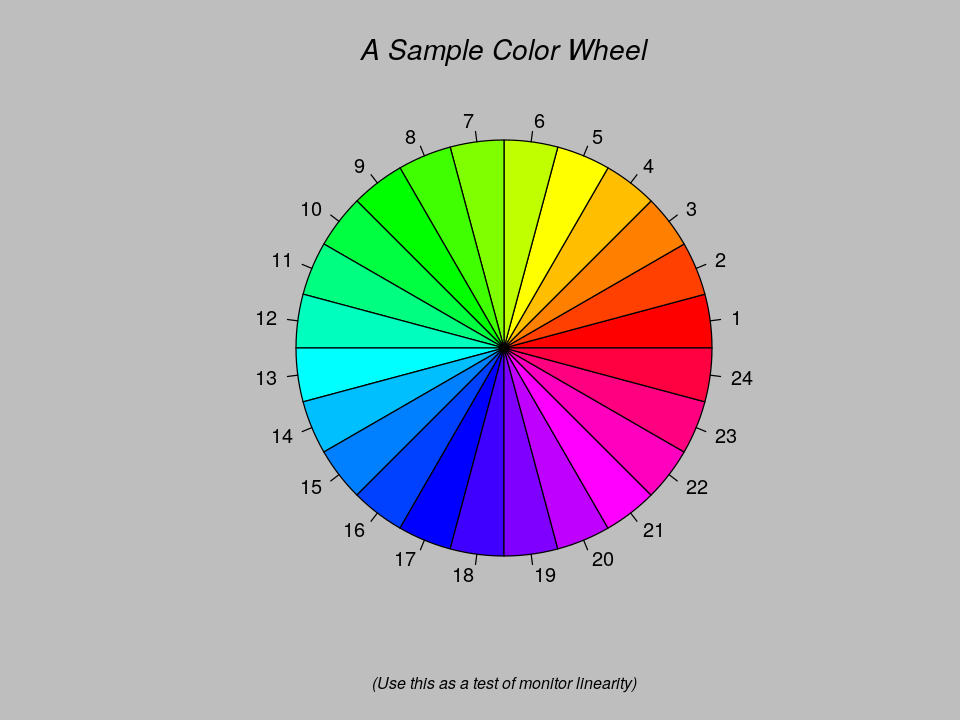

In [73]:
# Set plot size for this section
options(repr.plot.width=8, repr.plot.height=6)

par(bg = "gray")

pie(rep(1,24), col = rainbow(24), radius = 0.9) +
title(main = "A Sample Color Wheel", cex.main = 1.4, font.main = 3) +
title(xlab = "(Use this as a test of monitor linearity)",
      cex.lab = 0.8, font.lab = 3)

 A scatterplot matrix using Iris data

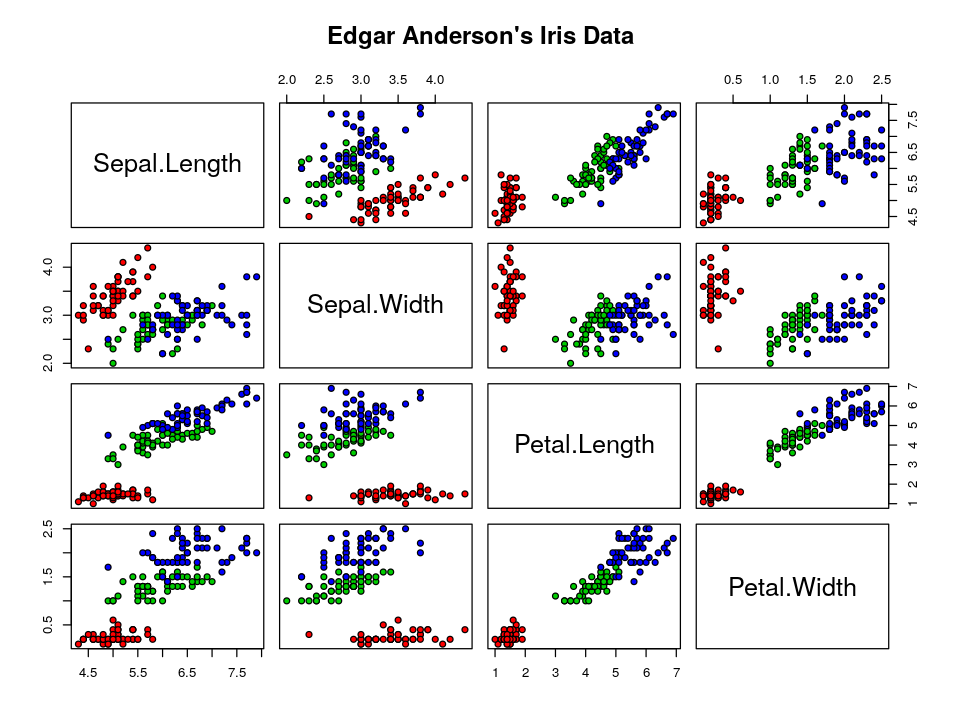

In [74]:
# Set plot size for this section
options(repr.plot.width=8, repr.plot.height=6)

pairs(iris[1:4], main="Edgar Anderson's Iris Data", pch=21,
       bg = c("red", "green3", "blue")[unclass(iris$Species)])